In [1]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

##### This example shows how to compose the below simple data prcessing system using the core 'primitives' of the library

![Screenshot 2024-10-20 at 9.40.13 AM.png](<attachment:Screenshot 2024-10-20 at 9.40.13 AM.png>)
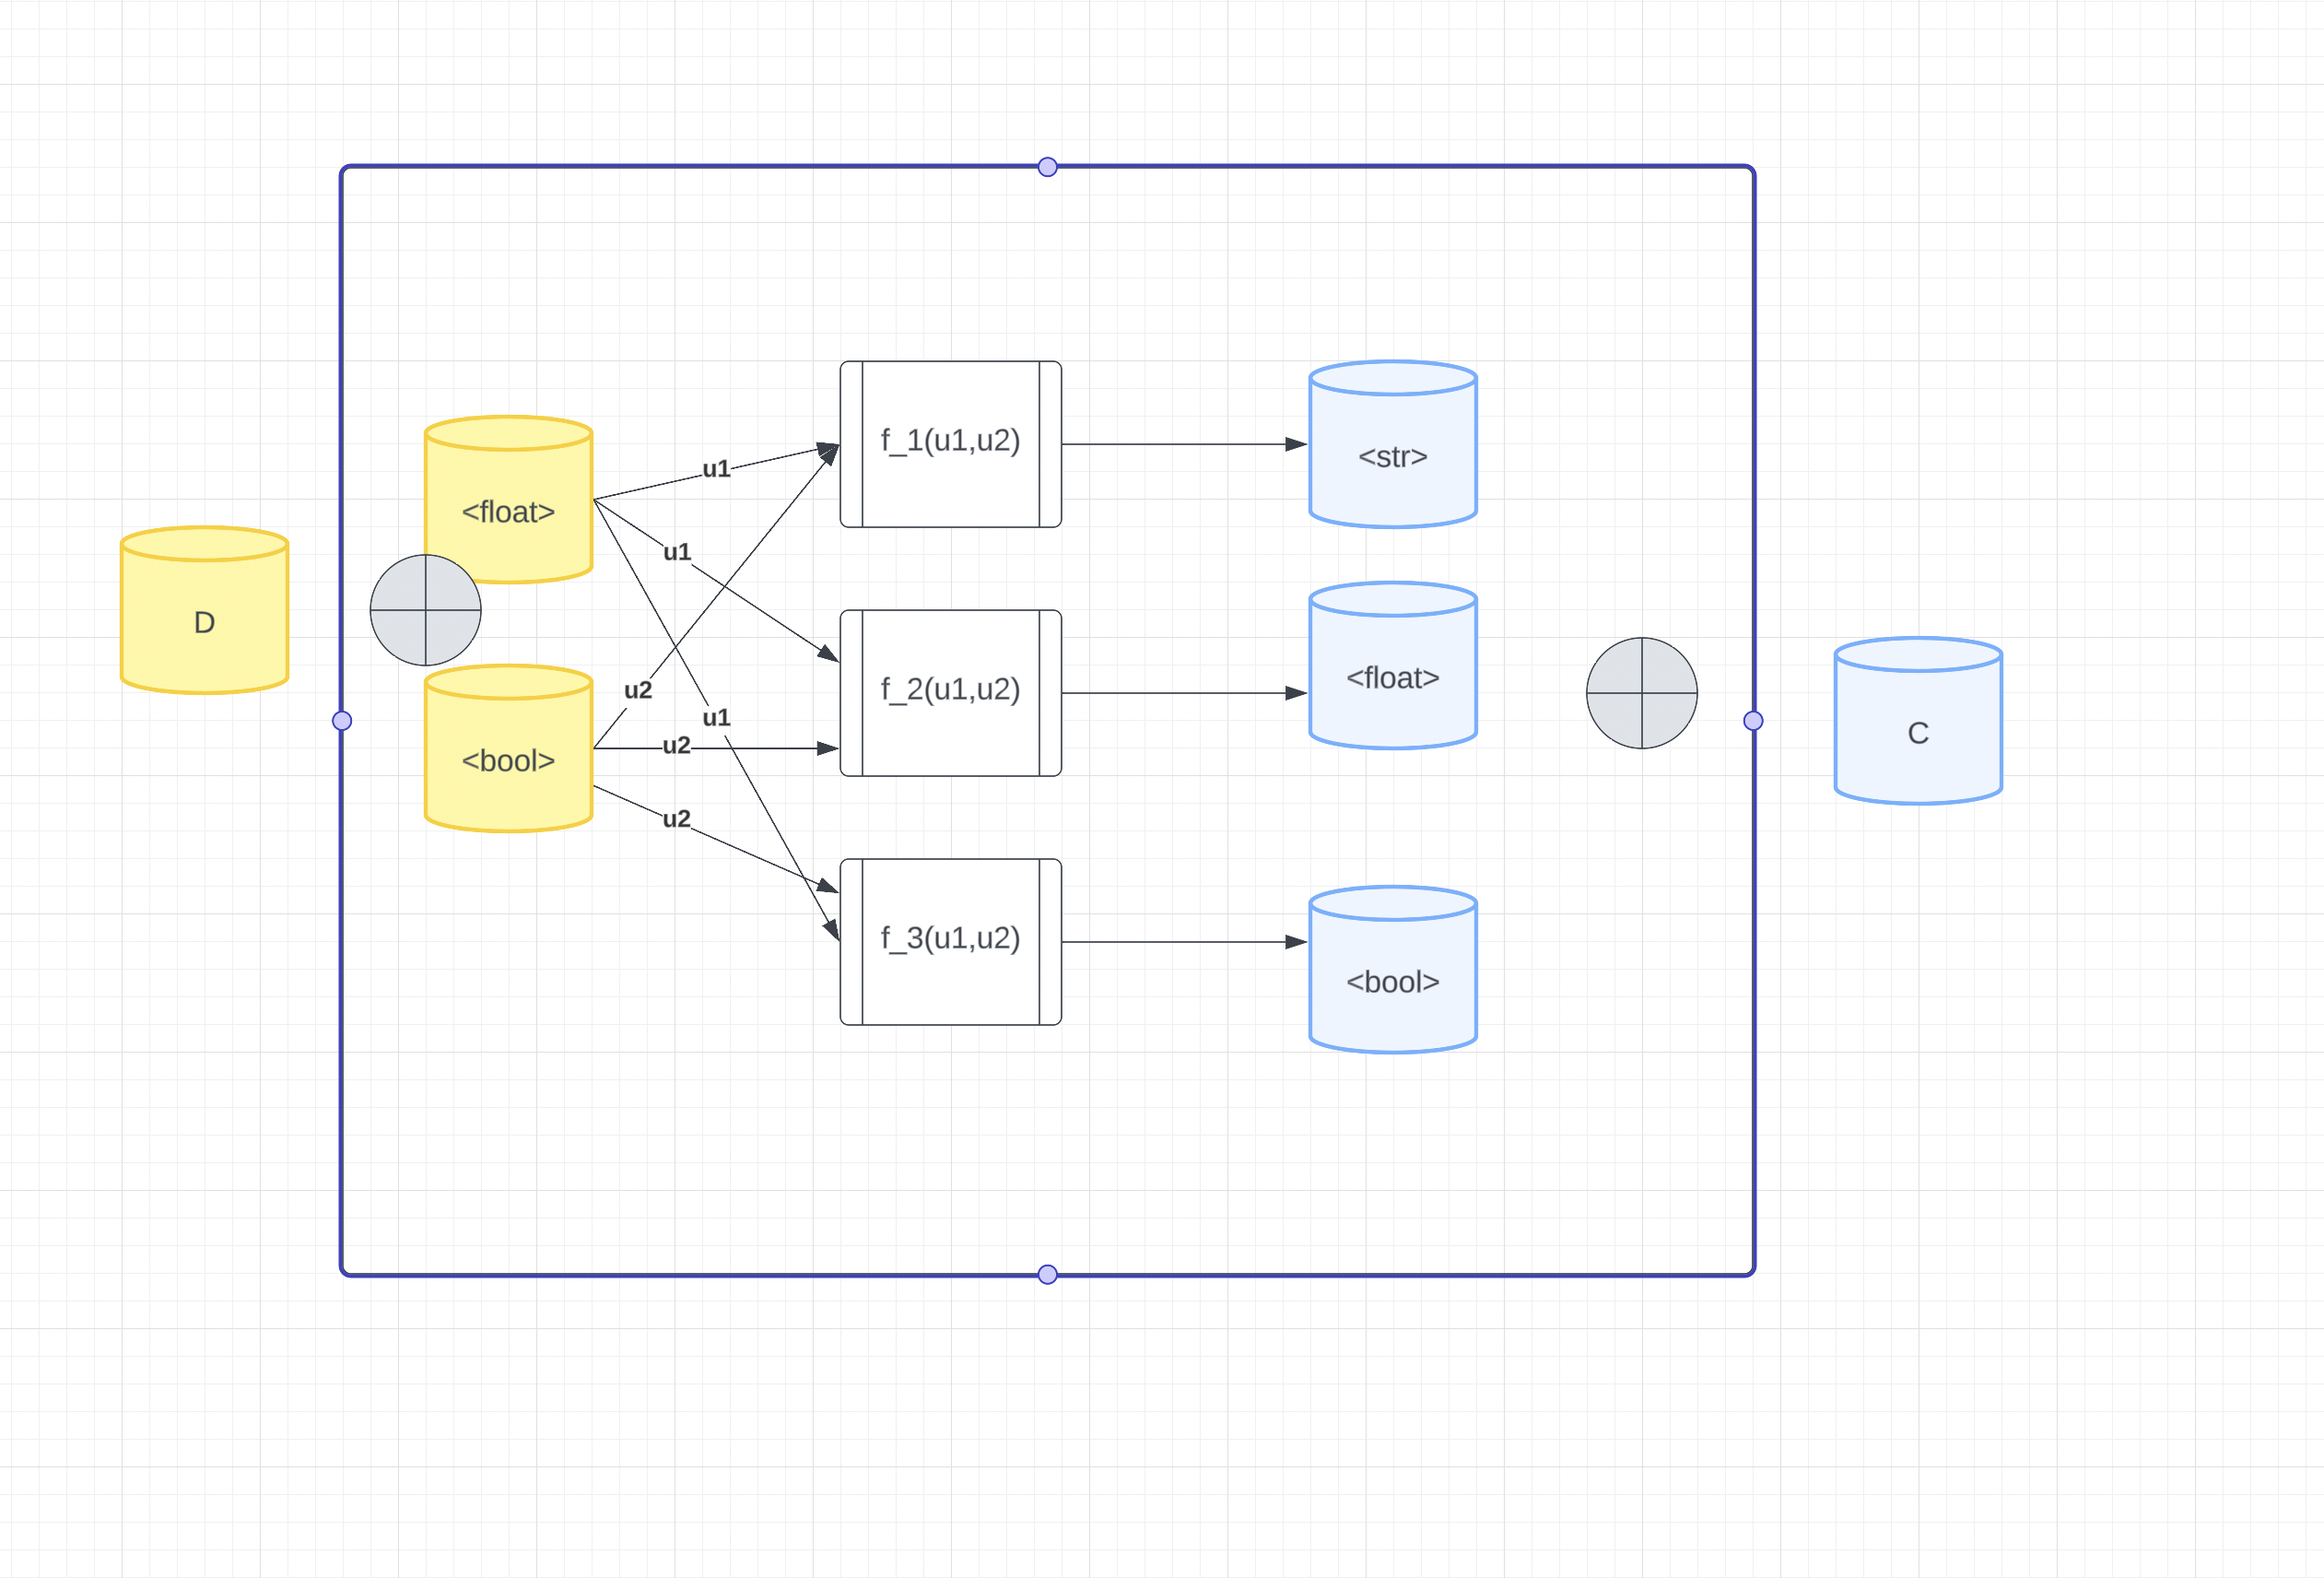

In [2]:
from core import (Dimension, Space, Point, Flow, NonlinearTransform, Block, 
                  CompositeBlock, CombinerBlock, OutputTypeBlock, Pipeline)

The script defines input and output dimensions using the `Dimension` class, and combines them into `Space` objects:

In [3]:
# Dimensions
dim_u1 = Dimension(name='u1')
dim_u2 = Dimension(name='u2', data_type=bool)

# Combined Input Space
space_combined_input = Space(name='CombinedInputSpace', dimensions=[dim_u1, dim_u2])

# Output Spaces
space_output_str = Space(name='OutputSpaceStr', dimensions=[Dimension('output_str', data_type=str)])
space_output_float = Space(name='OutputSpaceFloat', dimensions=[Dimension('output_float')])
space_output_bool = Space(name='OutputSpaceBool', dimensions=[Dimension('output_bool', data_type=bool)])

Processing Functions:

- Three processing functions are defined to perform specific transformations on the input data.

In [4]:
# Processing Functions
def f_1_function(inputs):
    u1 = inputs['u1']
    u2 = inputs['u2']
    return {'output_str': f"Result: {u1}" if u2 else "Condition not met"}

def f_2_function(inputs):
    u1 = inputs['u1']
    u2 = inputs['u2']
    return {'output_float': u1 * 2 if u2 else u1 / 2}

def f_3_function(inputs):
    u1 = inputs['u1']
    u2 = inputs['u2']
    return {'output_bool': u1 > 0 and u2}


NonlinearTransforms:
- The processing functions are wrapped in `NonlinearTransform` objects, which define the mapping between input and output spaces:

In [5]:
# Transforms
f_1_transform = NonlinearTransform(
    name='f_1',
    domain=space_combined_input,
    codomain=space_output_str,
    function=f_1_function
)

f_2_transform = NonlinearTransform(
    name='f_2',
    domain=space_combined_input,
    codomain=space_output_float,
    function=f_2_function
)

f_3_transform = NonlinearTransform(
    name='f_3',
    domain=space_combined_input,
    codomain=space_output_bool,
    function=f_3_function
)


`Block` objects are created for each transform, representing individual processing units:

In [6]:

# Blocks
f_1_block = Block(name='f_1_Block', transform=f_1_transform)
f_2_block = Block(name='f_2_Block', transform=f_2_transform)
f_3_block = Block(name='f_3_Block', transform=f_3_transform)


A `CombinerBlock` is used to merge the outputs of individual blocks into a unified output space:

In [7]:
# Combined Output Space
space_combined_output = Space(name='CombinedOutputSpace', dimensions=[
    Dimension('output_str', data_type=str),
    Dimension('output_float'),
    Dimension('output_bool', data_type=bool)
])

# Combiner Block
combiner_block = CombinerBlock(
    name='CombinerBlock',
    input_spaces=[space_output_str, space_output_float, space_output_bool],
    output_space=space_combined_output
)


A `CompositeBlock` named `system_block` is created to encapsulate the entire system, including internal blocks and their connections:

In [8]:
# Internal Blocks
internal_blocks = [
    f_1_block,
    f_2_block,
    f_3_block,
    combiner_block
]

# Connections between blocks
connections = [
    (f_1_block, combiner_block),
    (f_2_block, combiner_block),
    (f_3_block, combiner_block)
]

# Input and Output Spaces for the CompositeBlock
input_spaces = [space_combined_input]
output_spaces = [space_combined_output]

# Create the CompositeBlock
system_block = CompositeBlock(
    name='SystemBlock',
    internal_blocks=internal_blocks,
    connections=connections,
    input_spaces=input_spaces,
    output_spaces=output_spaces  # Corrected parameter name
)


A `Pipeline` object is created and the `system_block` is added to it:

In [9]:
# Main Pipeline
main_pipeline = Pipeline()
main_pipeline.add_block(system_block)


Data Flow:

- Input data is created as a `Point` object.
- An initial `Flow` object is created with the input point.
The pipeline is executed using the run method.
The output is retrieved from the resulting flow.


In [10]:

# Provide input values
input_values = {'u1': 5.0, 'u2': True}

# Create Point for inputs
combined_input_point = Point(space=space_combined_input, values=input_values)

# Create Initial Flow
initial_flow = Flow()
initial_flow.add_point(space_combined_input.name, combined_input_point)

# Run the Pipeline
output_flow = main_pipeline.run(initial_flow)

# Retrieve and print the Final Output
combined_output_point = output_flow.get_point('CombinedOutputSpace')

print("Input values:")
print(input_values)
print("_" * 20)
print(" ")

print("Output values:")
print(combined_output_point.values)
print("_" * 20)
print(" ")


Input values:
{'u1': 5.0, 'u2': True}
____________________
 
Output values:
{'output_str': 'Result: 5.0', 'output_float': 10.0, 'output_bool': True}
____________________
 


Ouput:

```txt
Input values:
{'u1': 5.0, 'u2': True}
____________________
 
Output values:
{'output_str': 'Result: 5.0', 'output_float': 10.0, 'output_bool': True}
____________________
```

The system implemented above can be mathematically represented as follows:

\begin{align*}
\text{Input: } & D = \{u_1 \in \mathbb{R}, u_2 \in \{0,1\}\} \\[10pt]
\text{Transformations: } & \\
& y_1 = f_1(u_1, u_2) \in \text{String} \\
& y_2 = f_2(u_1, u_2) \in \mathbb{R} \\
& y_3 = f_3(u_1, u_2) \in \{0,1\} \\[10pt]
\text{Output: } & C = \{y_1, y_2, y_3\}
\end{align*}

This mathematical representation directly corresponds to our implemented system:

1. Input (D):
   - u₁ is represented by 'u1' (a float)
   - u₂ is represented by 'u2' (a boolean)

2. Transformations:
   - f₁ is implemented by f_1_function, producing a string output
   - f₂ is implemented by f_2_function, producing a float output
   - f₃ is implemented by f_3_function, producing a boolean output

3. Output (C):
   - The combined output {y₁, y₂, y₃} is represented by the 'CombinedOutputSpace'

The system_block CompositeBlock encapsulates these transformations, 
and the Pipeline executes the entire process, demonstrating how the 
mathematical model is realized in our code implementation.